In [7]:
from fastPLNmodels.utils import build_block_Sigma, C_from_Sigma, sample_PLN, MSE
import torch
from fastPLNmodels.models import IMPS_PLN, log_likelihood, fastPLN
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [10]:
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
if torch.cuda.is_available():
    device = torch.device('cuda:0')
else : 
    device = torch.device('cpu')
    
#device = torch.device('cpu') # think I can't use RTX A5000 right now, will check this later. 
torch.cuda.is_available()
# print('device ', device)

False

## Importation of the data

In [217]:
Y = pd.read_csv('Y_test')
O = pd.read_csv('O_test')
cov = pd.read_csv('cov_test')
true_Sigma = torch.from_numpy(pd.read_csv('true_Sigma_test').values)

### Fit the fastPLN model

In [242]:
fast = fastPLN()
fast.fit(Y,O,cov, tol_delta = 0, tol_RMSE_M_grad= 0)

Initialization ...
nb iteration to find the mode:  259
Initialization finished
Maximum number of iterations reached :  200 last delta =  5.808483978799529e-08


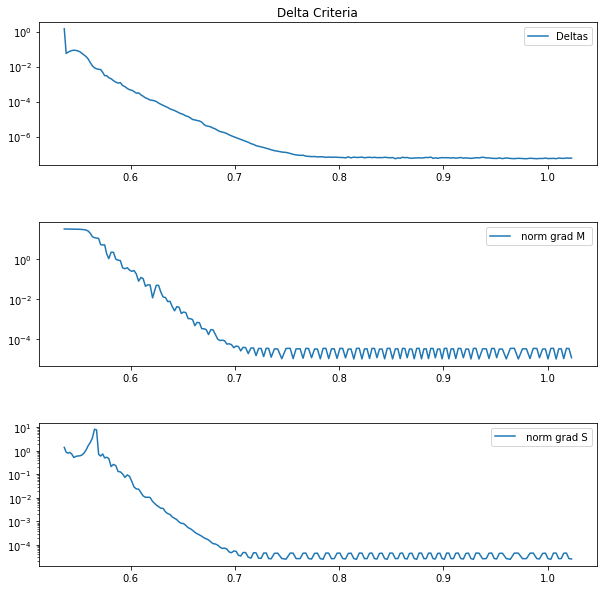

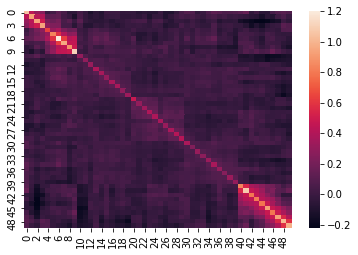

In [243]:
print(fast)

## test IMPS_PLN

In [228]:
imps = IMPS_PLN(q = 2)
imps.fit(Y,O,cov,acc = 0.005, lr = 0.1)

device  cpu
Intialization ...
Initalization done


 34%|███▍      | 68/200 [00:13<00:27,  4.87it/s]

Algorithm stopped after  68  iterations


No handles with labels found to put in legend.
No handles with labels found to put in legend.


max likelihood : -120.6715236369763


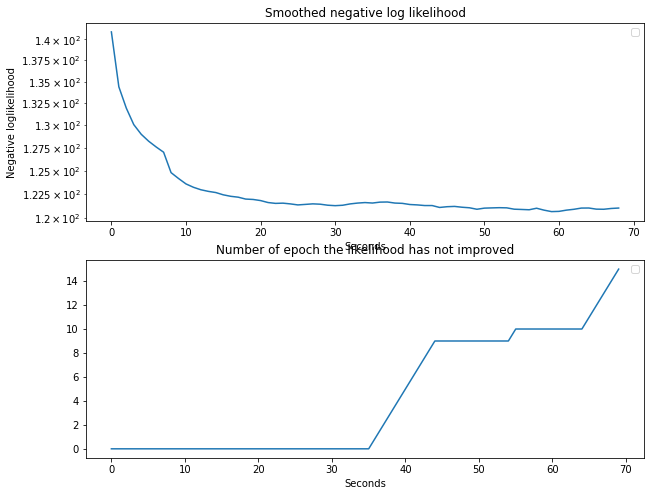

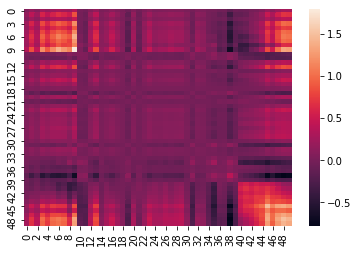

In [229]:
print(imps)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


max likelihood : -109.48116292908404


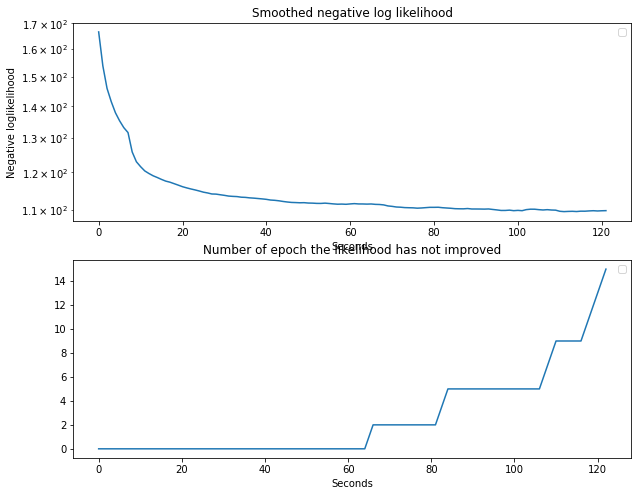

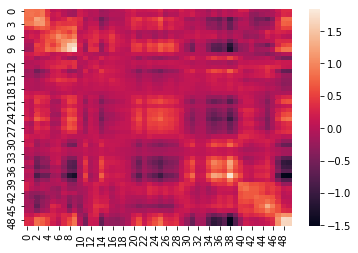

In [213]:
print(imps)

<AxesSubplot:>

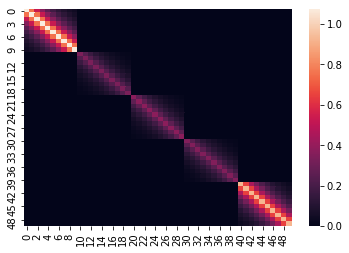

In [215]:
sns.heatmap(torch.from_numpy(true_Sigma.values))

In [230]:
torch.mean((imps.get_Sigma()-true_Sigma)**2)

tensor(0.0663)

In [225]:
torch.mean((imps.get_Sigma()-true_Sigma)**2)

tensor(0.0091)